<a href="https://colab.research.google.com/github/MUTTA-ISIGI/basic-ml-course/blob/Week_6/Lecture_6_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 6: Decision tree & Random forest

Good news! We don't have to implement anything from scratch today!

To make things easier, make a copy of this notebook and do the exercise in there.

Implement everywhere that has ...

In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [54]:
# Load the data
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names
print(X.shape, y.shape)

(20640, 8) (20640,)


In [55]:
print(feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Task 1 (1pt)

* Split the data into a training and validation set with 80%/20% distribution
* Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from sklearn for this. Remember to set the `random_state` parameter to 0 




In [56]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Task 2 (1 pt)
Train a decision tree model to predict house price. Remember to use the training set `X_train` to train the model
* Train a model with `max_depth=1`. Remember to set the `random_state=0` 
* Visualize the tree you just trained. You can refer to the code from the lecture video. 
* Which feature was used to split the data (choose 1 and write you answer in a comment below the code
    * `MedInc`
    * `AveRooms`
    * `AveBedrms`
    * `HouseAge`

In [57]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
# for visualization
import graphviz

Here's the answer:


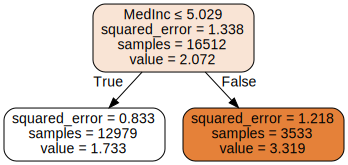

In [58]:
# Initialize the decision tree class and train the decision tree
tree = DecisionTreeRegressor(max_depth=1, random_state=0)
tree = tree.fit(X_train,y_train)

# Visualize the tree

graph = graphviz.Source(export_graphviz(tree,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names = data['feature_names']) )

# Write you answer here: ...
print("Here's the answer:")
graph

## Task 3 (2pt)
* Train a decision tree with `max_depth=3`.
* Don't forget `random_state=0`
* Print the mean square error on the validation set.
* What is the mean square error you just calculate.
 Write you answer in the comment below the code.


In [59]:

# Train the model
from sklearn.metrics import mean_squared_error
tree_X = DecisionTreeRegressor(max_depth=3, random_state=0)
tree_X = tree.fit(X_train,y_train)
prediction = tree_X.predict(X_valid)

# Print the mean squared error
mse = mean_squared_error(y_valid, prediction)


# What's the mean squared error you just calculate: 
print("The mean squared error is:",mse)

The mean squared error is: 0.9331718110164576


## Task 4 (2pt)
Tune the `max_depth` parameter of the model
* Try different values for `max_depth`: `[5, 6, 7, 8, 9, 10, 11, 12]`
* Don't forget `random_state=0`
* Print out the mean square error for each value of `max_depth`
* What is the best value for `max_depth`? Write you answer in the comment below the code.

In [60]:
# Your code here
heighest_mse = 1
for depth in [5, 6, 7, 8, 9, 10, 11, 12]:

  tree = DecisionTreeRegressor(max_depth=depth, random_state=0)
  tree = tree.fit(X_train,y_train)
  prediction = tree.predict(X_valid)

# Print the mean squared error
  mse = mean_squared_error(y_valid, prediction)
  print('The Training Accuracy for depth %s'%(depth) + " MSE is " ,mse)

# What's the best max_depth: 
  if heighest_mse > mse:
    heighest_mse = mse
print("The best max_depth MSE is : ",heighest_mse)

The Training Accuracy for depth 5 MSE is  0.5401962207714344
The Training Accuracy for depth 6 MSE is  0.4984109265539033
The Training Accuracy for depth 7 MSE is  0.4596987909870867
The Training Accuracy for depth 8 MSE is  0.44604575226916726
The Training Accuracy for depth 9 MSE is  0.4313636207268005
The Training Accuracy for depth 10 MSE is  0.4470239650247865
The Training Accuracy for depth 11 MSE is  0.444291361570811
The Training Accuracy for depth 12 MSE is  0.45049079652055624
The best max_depth MSE is :  0.4313636207268005


## Task 5 (1pt)
Let's switch to random forest

Train a random forest model with
* n_estimators=20
* random_state=0

What is the mean square error on the validation set? Write you answer in the comment below the code

In [61]:
from sklearn.ensemble import RandomForestRegressor


In [64]:
# Your code here
regressor = RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X_train,y_train)
pred= regressor.predict(X_valid)

#The mean square error on the validation set
mse = mean_squared_error(y_valid, pred)
print("Mean Square Error on the validation set is ",mse)


Mean Square Error on the validation set is  0.26946775214546204


## Task 6 (2pt)
Tune different hyperparameter of random forest
* `random_state=0`
* Try different values for `max_features`: `[0.5, 'sqrt', 'log2']`
* For each of these values for `max_features`, try different values of `n_estimators` from 10 to 100 (with step size 10): i.e `[10, 20, 30, ...]` 
* Optionally set `n_jobs=-1` to train faster

In [66]:
# Your code here 
from sklearn.model_selection import RandomizedSearchCV
parameters={
            "max_depth" : [1,3,5,7,9,11,12],
            'n_estimators': np.arange(10,110,10),
           "max_features":["auto","sqrt",'log2']}

X = RandomForestRegressor()
X_random = RandomizedSearchCV(estimator = X,random_state=0, n_jobs = -1,cv= 5,verbose = 2, param_distributions = parameters)
X_random.fit(X_train, y_train) 
print(X_random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 90, 'max_features': 'auto', 'max_depth': 12}


## Task 7 (1pt)

Extract feature importance of the model
Train a random forest model with:
* `n_estimators=10`
* `max_dept=15`
* `random_state=0`

Get the feature importance attribute of the model. You can use the `feature_importances_` attibute 

What is the most important feature? write your answer in a comment in the code cell below.

In [68]:
# Train your model
X = RandomForestRegressor()
X.fit(X_train, y_train)

# Get feature importance
feature_importances = X.feature_importances_

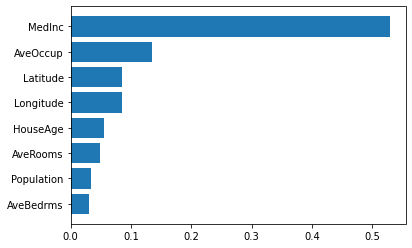

In [69]:
df_importances = pd.DataFrame()
df_importances['feature'] = feature_names
df_importances['importance'] = feature_importances
df_importances.sort_values(by='importance', inplace=True)

plt.barh(range(df_importances.shape[0]), df_importances.importance)
plt.yticks(range(df_importances.shape[0]), df_importances.feature)

plt.show()

#The most important feature: 
